In [37]:
#libraries used 
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    RandomForestClassifier, 
    AdaBoostClassifier, 
    GradientBoostingClassifier
)
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# URLs for the Red and White wine datasets
red_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
white_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv"

# Load the data - Note the sep=';'
red_wine = pd.read_csv(red_url, sep=';')
white_wine = pd.read_csv(white_url, sep=';')

# Professional Step: Add a column to distinguish them before merging
red_wine['type'] = 'red'
white_wine['type'] = 'white'

# Combine them into one "Master" dataframe
df = pd.concat([red_wine, white_wine])

print(f"Dataset loaded! Total rows: {len(df)}")
print(df.head())

Dataset loaded! Total rows: 6497
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality type  
0      9.4        5  red  

In [3]:
red_wine.shape

(1599, 13)

In [4]:
white_wine.shape

(4898, 13)

In [5]:
df_red = pd.DataFrame(red_wine)
df_red

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,red
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,red
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,red
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,red
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,red
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,red
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,red


In [6]:
df_white = pd.DataFrame(white_wine)
df_white

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6,white
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6,white
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6,white
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,white
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,white
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white


In [7]:
df_white.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
 12  type                  4898 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 497.6+ KB


In [8]:
#separateing 
# - Low:       0-4 (4 exclusive)
# - Medium Low: 4-5 ( exclusive)
# - Medium High: 6-7 (6 exclusive)
# - High:      6-7 (7 exclusive)
# - Very High: 7-10 (10 exclusive)

bins = [0, 4, 6, 7, 8, 10]
choices = ['Low', 'Medium Low', 'Medium High', 'High', 'Very High']

df_white['quality_category'] = pd.cut(df_white['quality'], bins=bins, labels=choices, right=False)

# Verify the distribution of the new quality categories
print(df_white['quality_category'].value_counts())

quality_category
Medium High    2198
Medium Low     1620
High            880
Very High       180
Low              20
Name: count, dtype: int64


In [51]:
#Converting categorical into numerical, dropping 'type', 'quality' related column 
df_white_cleaned = df_white.drop(columns = ['type', 'quality']) ####

#Initializing the encoder
le = LabelEncoder()

#Putting the encoded quality category into one column 
df_white_cleaned['quality_category_encoded'] = le.fit_transform(df_white_cleaned['quality_category'])

In [52]:
# This calculates the correlation for all numeric columns & correlation of features to target, which is the quality category 
correlation_matrix = df_white_cleaned.corr(numeric_only=True)
print(correlation_matrix['quality_category_encoded'].sort_values(ascending=False))

quality_category_encoded    1.000000
density                     0.245818
chlorides                   0.166416
total sulfur dioxide        0.150602
volatile acidity            0.143308
residual sugar              0.107851
fixed acidity               0.064760
free sulfur dioxide         0.020679
citric acid                 0.020081
sulphates                  -0.061929
pH                         -0.077118
alcohol                    -0.329838
Name: quality_category_encoded, dtype: float64


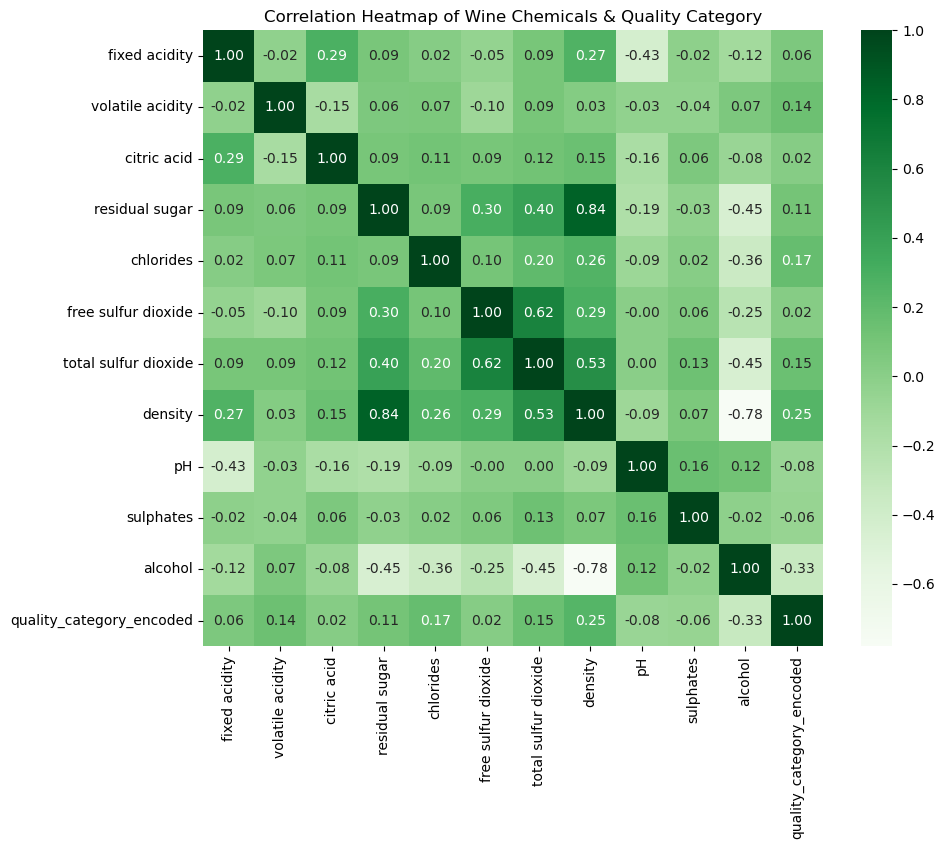

In [53]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='Greens', fmt=".2f")
plt.title("Correlation Heatmap of Wine Chemicals & Quality Category")
plt.show()

C:\Users\akoki\AppData\Local\Temp\ipykernel_12776\3829433250.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=target_links.values, y=target_links.index, palette='Greens_r')


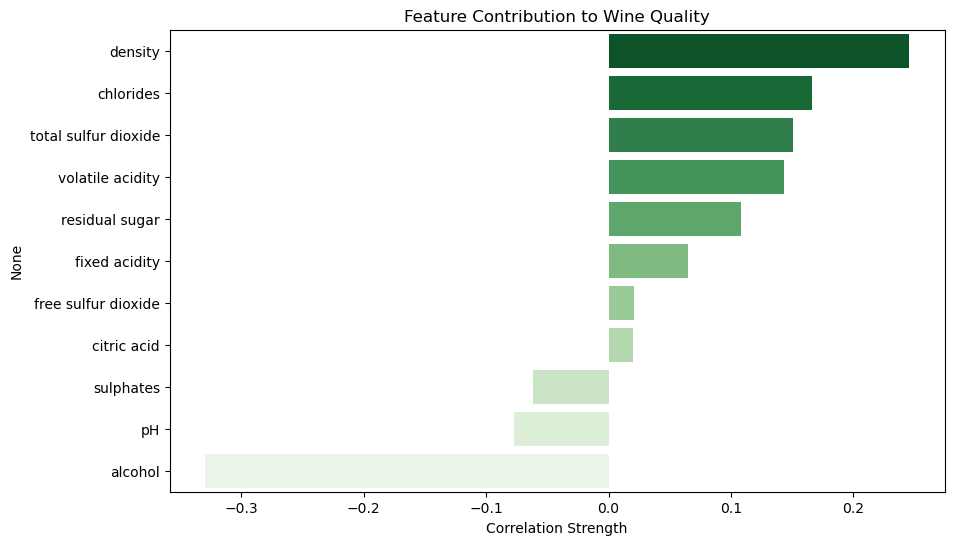

In [12]:
#Correlation bar graph to make it presentation friendly 
correlations = df_white_cleaned.corr(numeric_only=True)
target_links = correlations['quality_category_encoded'].drop(['quality_category_encoded', 'quality'], errors='ignore')
target_links = target_links.sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=target_links.values, y=target_links.index, palette='Greens_r')
plt.title('Feature Contribution to Wine Quality')
plt.xlabel('Correlation Strength')
plt.show()

In [13]:
#Separating Feature columns from target one for white wine 
features = df_white_cleaned.drop(columns = ["quality_category_encoded", "quality_category","quality"])
target = df_white_cleaned["quality_category_encoded"]
df_white_cleaned

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_category,quality_category_encoded
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6,Medium High,2
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6,Medium High,2
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6,Medium High,2
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,Medium High,2
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,Medium High,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,Medium High,2
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,Medium Low,3
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,Medium High,2
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,High,0


In [14]:
#Train/Test Separation 
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.20, random_state=42)

In [15]:
#MinMax Scaling & Transformation 0-1
normalizer = MinMaxScaler()
normalizer.fit(X_train)
X_train_norm = normalizer.transform(X_train)
X_test_norm = normalizer.transform(X_test)
X_train_norm, X_test_norm

(array([[0.4375    , 0.08823529, 0.21686747, ..., 0.38181818, 0.22093023,
         0.70967742],
        [0.3125    , 0.16666667, 0.26506024, ..., 0.41818182, 0.34883721,
         0.24193548],
        [0.225     , 0.23529412, 0.19879518, ..., 0.48181818, 0.31395349,
         0.5       ],
        ...,
        [0.475     , 0.18627451, 0.31325301, ..., 0.27272727, 0.36046512,
         0.5483871 ],
        [0.3125    , 0.15686275, 0.1746988 , ..., 0.40909091, 0.18604651,
         0.41935484],
        [0.5375    , 0.18627451, 0.21084337, ..., 0.45454545, 0.47674419,
         0.38709677]], shape=(3918, 11)),
 array([[0.275     , 0.20588235, 0.24698795, ..., 0.33636364, 0.43023256,
         0.47849462],
        [0.2       , 0.44117647, 0.09638554, ..., 0.43636364, 0.36046512,
         0.83870968],
        [0.4125    , 0.16666667, 0.23493976, ..., 0.50909091, 0.24418605,
         0.67741935],
        ...,
        [0.2625    , 0.17647059, 0.12650602, ..., 0.50909091, 0.24418605,
         0.24193

In [16]:
#using KNN to train the model, checking for accuracy 
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train_norm, y_train)
y_pred = knn.predict(X_test_norm)
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

Accuracy: 0.573469387755102


In [18]:
#AdaBoosting, Classifier 
ada_clf = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=20),
    n_estimators=100,
    random_state=42
)

# 2. Fit the model
ada_clf.fit(X_train_norm, y_train)

# 3. Predict
pred = ada_clf.predict(X_test_norm)

# 4. Assessment
print(f"Overall Accuracy: {accuracy_score(y_test, pred):.2%}")
print("-" * 30)
print("Detailed Performance Report:")
print(classification_report(y_test, pred))

Overall Accuracy: 69.18%
------------------------------
Detailed Performance Report:
              precision    recall  f1-score   support

           0       0.66      0.60      0.63       192
           1       0.00      0.00      0.00         5
           2       0.67      0.71      0.69       432
           3       0.74      0.75      0.74       316
           4       0.72      0.51      0.60        35

    accuracy                           0.69       980
   macro avg       0.56      0.52      0.53       980
weighted avg       0.69      0.69      0.69       980



C:\Users\akoki\miniconda3\envs\data_env\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\akoki\miniconda3\envs\data_env\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\akoki\miniconda3\envs\data_env\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", 

In [19]:
# Gradient Boosting Classifier 
gb_clf = GradientBoostingClassifier(max_depth=5, n_estimators=100, random_state=42)
# Note: I reduced max_depth to 5. Gradient Boosting overfits EXTREMELY fast at depth 20.
gb_clf.fit(X_train_norm, y_train)

# 2. Predict
gb_pred = gb_clf.predict(X_test_norm)

# 3. Assessment
print("--- Gradient Boosting Results ---")
print(f"Accuracy: {accuracy_score(y_test, gb_pred):.2%}")
print(classification_report(y_test, gb_pred))

--- Gradient Boosting Results ---
Accuracy: 65.51%
              precision    recall  f1-score   support

           0       0.66      0.49      0.57       192
           1       0.25      0.20      0.22         5
           2       0.62      0.71      0.66       432
           3       0.70      0.71      0.70       316
           4       0.68      0.49      0.57        35

    accuracy                           0.66       980
   macro avg       0.58      0.52      0.54       980
weighted avg       0.66      0.66      0.65       980



In [23]:
#Random Forest Classifier 
rf_clf = RandomForestClassifier(max_depth=20, n_estimators=100, random_state=42)
rf_clf.fit(X_train_norm, y_train)

# 2. Predict
rf_pred = rf_clf.predict(X_test_norm)

# 3. Assessment
print("--- Random Forest Results ---")
print(f"Accuracy: {accuracy_score(y_test, rf_pred):.2%}")
print(classification_report(y_test, rf_pred))

--- Random Forest Results ---
Accuracy: 72.76%


C:\Users\akoki\miniconda3\envs\data_env\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\akoki\miniconda3\envs\data_env\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


              precision    recall  f1-score   support

           0       0.78      0.61      0.69       192
           1       0.00      0.00      0.00         5
           2       0.69      0.81      0.74       432
           3       0.77      0.73      0.75       316
           4       0.83      0.43      0.57        35

    accuracy                           0.73       980
   macro avg       0.61      0.52      0.55       980
weighted avg       0.73      0.73      0.72       980



C:\Users\akoki\miniconda3\envs\data_env\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


In [29]:
# Smote Implementation
smote = SMOTE(sampling_strategy='auto', k_neighbors=3, random_state=42)

X_train_res, y_train_res = smote.fit_resample(X_train_norm, y_train)

print(f"Original training size: {X_train_norm.shape[0]}")
print(f"New training size after SMOTE: {X_train_res.shape[0]}")

forest_smote_clf = RandomForestClassifier(n_estimators=100, max_depth=20, random_state=42)
forest_smote_clf.fit(X_train_res, y_train_res)

pred_smote = forest_smote_clf.predict(X_test_norm)

print("--- Results with SMOTE ---")
print(f"Accuracy Score: {accuracy_score(y_test, pred_smote):.4f}")

print("\nClassification Report:")
print(classification_report(y_test, pred_smote))

Original training size: 3918
New training size after SMOTE: 8830
--- Results with SMOTE ---
Accuracy Score: 0.6959

Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.67      0.66       192
           1       0.20      0.20      0.20         5
           2       0.71      0.67      0.69       432
           3       0.74      0.76      0.75       316
           4       0.50      0.69      0.58        35

    accuracy                           0.70       980
   macro avg       0.56      0.60      0.58       980
weighted avg       0.70      0.70      0.70       980



In [32]:
#Hyper Parameter Testing with Grid Search for Random Forest 
forest = RandomForestClassifier(random_state=42)

# the parameters 
param_grid = {
    'n_estimators': [100],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5]
}

# Tuning & Cross Validation 
grid_search = GridSearchCV(forest, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_res, y_train_res)

print(f"Best Parameters: {grid_search.best_params_}")

Best Parameters: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 100}


In [35]:
#Grid Search Final Tuned Model Performance 
best_rf = grid_search.best_estimator_


final_preds = best_rf.predict(X_test_norm)

print("=== FINAL TUNED MODEL PERFORMANCE ===")
print(f"Accuracy: {accuracy_score(y_test, final_preds):.4f}")
print("-" * 30)
print(classification_report(y_test, final_preds))

=== FINAL TUNED MODEL PERFORMANCE ===
Accuracy: 0.6959
------------------------------
              precision    recall  f1-score   support

           0       0.66      0.67      0.66       192
           1       0.20      0.20      0.20         5
           2       0.71      0.67      0.69       432
           3       0.74      0.76      0.75       316
           4       0.50      0.69      0.58        35

    accuracy                           0.70       980
   macro avg       0.56      0.60      0.58       980
weighted avg       0.70      0.70      0.70       980



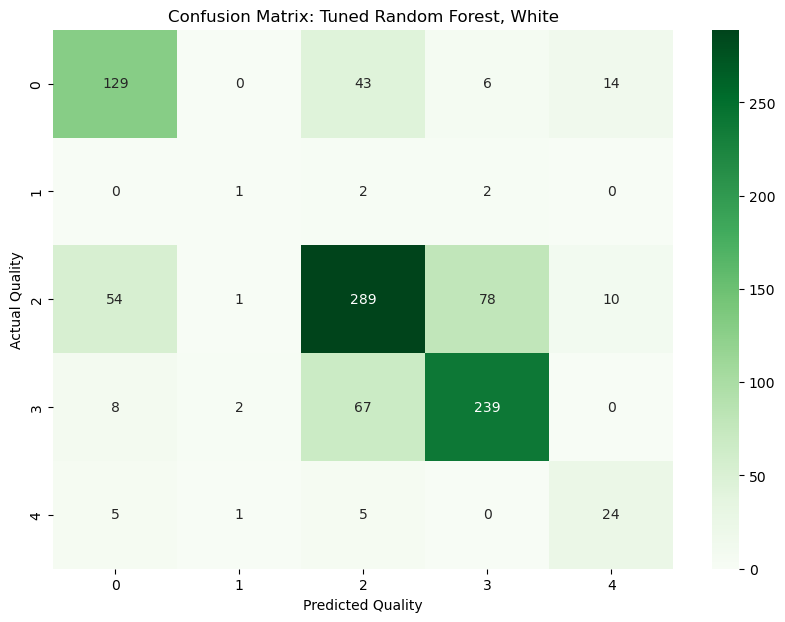

<Figure size 640x480 with 0 Axes>

In [47]:
#Confusion Matrix used to assess the tuned Random Forests prediction 
plt.figure(figsize=(10, 7))
cm = confusion_matrix(y_test, final_preds)
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', 
            xticklabels=sorted(y_test.unique()), 
            yticklabels=sorted(y_test.unique()))
plt.xlabel('Predicted Quality')
plt.ylabel('Actual Quality')
plt.title('Confusion Matrix: Tuned Random Forest, White')
plt.show()
plt.savefig('confusion_matrix_green.png', dpi=300, bbox_inches='tight')

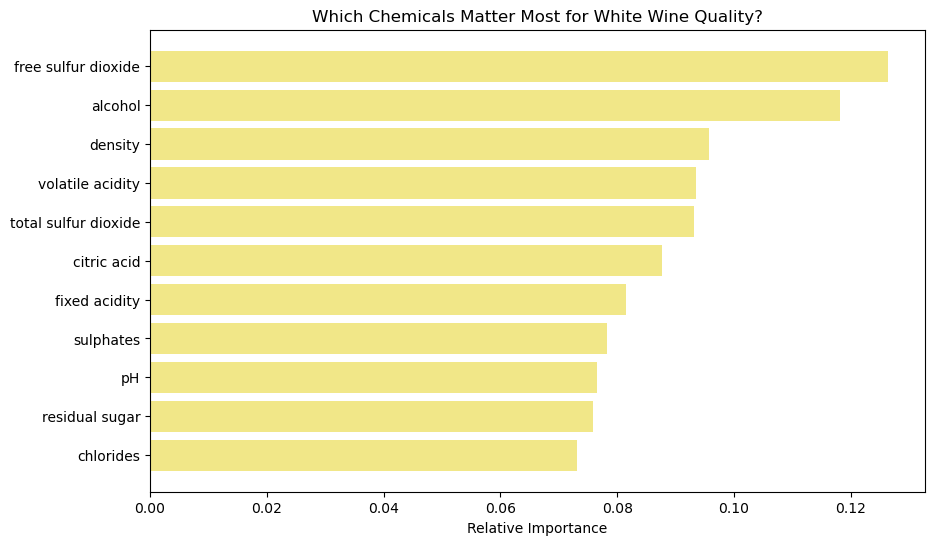

<Figure size 640x480 with 0 Axes>

In [44]:
# Feature Importance scores
importances = best_rf.feature_importances_
features = X_train.columns
indices = np.argsort(importances)

# Visualising the scores for White Wine 
plt.figure(figsize=(10, 6))
plt.title('Which Chemicals Matter Most for White Wine Quality?')
plt.barh(range(len(indices)), importances[indices], color='#F1E788', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()
plt.savefig('wine_feature_importance.png', dpi=300, bbox_inches='tight')